# **Análisis contaminantes registrados**

*Nota: hacer el trabajo con el nuevo conjunto de datos llamado "CSV_Datos_Ok.csv"*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from fitter import Fitter, get_common_distributions, get_distributions

guardar_imagenes = True

In [2]:
datosContaminantes = pd.read_csv("CSV_Datos_OK.csv", parse_dates={"Fecha":["Año", "Mes", "Día"]})
datosContaminantes = datosContaminantes.drop(["Minuto", "Segundo"], axis=1)
datosContaminantes

,Fecha,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-11-27,12,43.0000,1,1,12,pm25
1,2012-11-27,13,22.0000,1,1,12,pm25
2,2012-11-27,14,31.0000,1,1,12,pm25
3,2012-11-27,15,29.0000,1,1,12,pm25
4,2012-11-27,16,32.0000,1,1,12,pm25
...,...,...,...,...,...,...,...
1185035,2022-07-31,19,10.6495,1,1,86,pm25
1185036,2022-07-31,20,9.4167,1,1,86,pm25
1185037,2022-07-31,21,15.2623,1,1,86,pm25
1185038,2022-07-31,22,16.4119,1,1,86,pm25


In [3]:
# Funcion para convertir valores str en float
def ToFloat(df):
    if isinstance(df, str):
        if df.count('.') == 2:
            return float( df.replace('.', '', 1) )
        else:
            return float(df)
    else:
        return float(df)

# Funcion para extraer los dias de la semana
def DayOfWeek(df):
    return df.strftime('%A')

In [4]:
# Reemplazando valores en la columna a aplicar la funcion ToFloat
datosContaminantes["valor_contaminante"] = datosContaminantes["valor_contaminante"].apply(ToFloat)

# insertando los dias
datosContaminantes.insert(1, "Dia_Semana", np.array( datosContaminantes["Fecha"].apply(DayOfWeek) ) )

datosContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-11-27,Tuesday,12,43.0000,1,1,12,pm25
1,2012-11-27,Tuesday,13,22.0000,1,1,12,pm25
2,2012-11-27,Tuesday,14,31.0000,1,1,12,pm25
3,2012-11-27,Tuesday,15,29.0000,1,1,12,pm25
4,2012-11-27,Tuesday,16,32.0000,1,1,12,pm25
...,...,...,...,...,...,...,...,...
1185035,2022-07-31,Sunday,19,10.6495,1,1,86,pm25
1185036,2022-07-31,Sunday,20,9.4167,1,1,86,pm25
1185037,2022-07-31,Sunday,21,15.2623,1,1,86,pm25
1185038,2022-07-31,Sunday,22,16.4119,1,1,86,pm25


Arreglamos los datos que presenten inconsistencias, ordenamos de menor a mayor por fechas y borramos columna de índice duplicada tras la última operación:

In [5]:
datosContaminantes = datosContaminantes[(datosContaminantes["valor_contaminante"] >= 0.0) & \
                                        (datosContaminantes["valor_contaminante"] != 999.0) & \
                                        (datosContaminantes["calidad_contaminante"] != 151)]
datosContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-11-27,Tuesday,12,43.0000,1,1,12,pm25
1,2012-11-27,Tuesday,13,22.0000,1,1,12,pm25
2,2012-11-27,Tuesday,14,31.0000,1,1,12,pm25
3,2012-11-27,Tuesday,15,29.0000,1,1,12,pm25
4,2012-11-27,Tuesday,16,32.0000,1,1,12,pm25
...,...,...,...,...,...,...,...,...
1185035,2022-07-31,Sunday,19,10.6495,1,1,86,pm25
1185036,2022-07-31,Sunday,20,9.4167,1,1,86,pm25
1185037,2022-07-31,Sunday,21,15.2623,1,1,86,pm25
1185038,2022-07-31,Sunday,22,16.4119,1,1,86,pm25


In [6]:
datosContaminantes = datosContaminantes.sort_values(by=["Fecha", "Hora"]).reset_index().drop("index", axis=1)
datosContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-09-18,Tuesday,12,16.0000,1,1,25,pm25
1,2012-09-18,Tuesday,13,18.0000,1,1,25,pm25
2,2012-09-18,Tuesday,14,18.0000,1,1,25,pm25
3,2012-09-18,Tuesday,15,17.0000,1,1,25,pm25
4,2012-09-18,Tuesday,16,17.0000,1,1,25,pm25
...,...,...,...,...,...,...,...,...
1185035,2022-08-31,Wednesday,19,113.3006,1,1,6,nox
1185036,2022-08-31,Wednesday,20,46.5652,1,1,6,nox
1185037,2022-08-31,Wednesday,21,51.3882,1,1,6,nox
1185038,2022-08-31,Wednesday,22,88.6126,1,1,6,nox


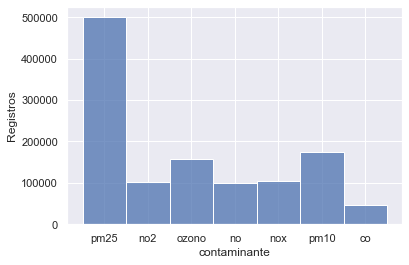

In [7]:
sns.set_theme(style='dark')
sns.color_palette("dark:salmon_r", as_cmap=True)

sns.histplot(data=datosContaminantes, x="contaminante")

plt.ylabel('Registros')
sns.set(rc={'figure.figsize':(9, 8)})

#plt.savefig('registros_contaminantes.png', bbox_inches='tight', dpi=200)
plt.grid(); plt.show()

## **Muestra aleatoria de tamaño definido**

Se ha elegido un tamaño de muestra representativo de $n=1600$ datos

In [8]:
# muestra aleatoria de tamaño 1600
muestraContaminantes = datosContaminantes.sample(n=1600)
muestraContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
408667,2017-11-26,Sunday,2,34.8254,1,1,83,pm25
288384,2017-02-15,Wednesday,5,36.1669,1,1,25,nox
152052,2016-01-08,Friday,14,44.0000,1,1,6,nox
635328,2019-01-28,Monday,6,14.1789,1,1,25,no2
664659,2019-03-26,Tuesday,6,137.2340,1,1,6,nox
...,...,...,...,...,...,...,...,...
85950,2015-06-09,Tuesday,3,5.0000,1,1,6,no
579842,2018-10-17,Wednesday,6,37.0509,1,1,25,nox
693803,2019-05-22,Wednesday,9,113.0000,1,1,46,pm10
727369,2019-07-27,Saturday,6,38.2091,1,1,6,no


Ordenando los valores:

In [9]:
# ordenar los valores de la muestra
muestraContaminantes = muestraContaminantes.sort_values(by=["Fecha", "Hora"]).reset_index().drop("index", axis=1)
muestraContaminantes

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-10-05,Friday,10,28.0000,1,1,25,pm25
1,2012-10-16,Tuesday,2,23.0000,1,1,25,pm25
2,2012-11-28,Wednesday,1,8.0000,1,1,25,pm25
3,2012-11-28,Wednesday,7,49.0000,1,1,25,pm25
4,2012-12-12,Wednesday,5,40.0000,1,1,12,pm25
...,...,...,...,...,...,...,...,...
1595,2022-07-19,Tuesday,21,25.0000,1,1,44,pm25
1596,2022-07-22,Friday,14,25.0000,1,1,12,pm25
1597,2022-07-22,Friday,23,22.0000,1,1,12,pm25
1598,2022-07-26,Tuesday,13,6.0160,1,1,83,pm25


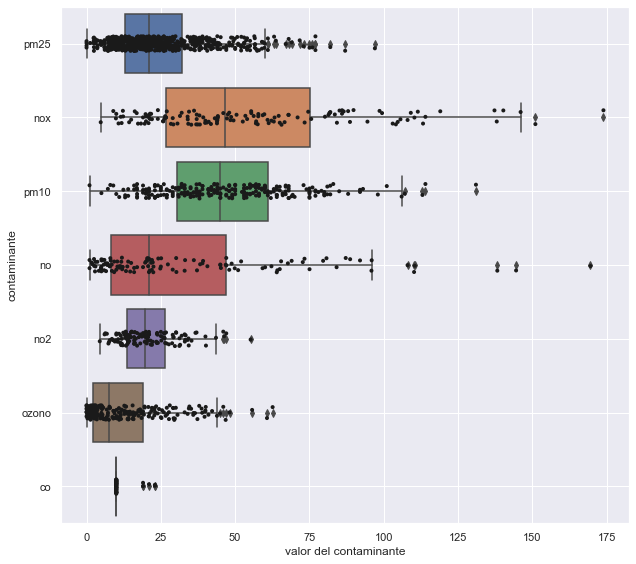

In [10]:
sns.set_theme(style='dark')

sns.boxplot(data=muestraContaminantes, x='valor_contaminante', y='contaminante')

sns.stripplot(data=muestraContaminantes, x='valor_contaminante', y='contaminante',
              size=4, color='k', linewidth=0)

sns.set(rc={'figure.figsize':(9, 7)})
plt.xlabel("valor del contaminante"); plt.grid()
plt.tight_layout()

# para guardar el plot
if guardar_imagenes:
    plt.savefig('boxplots_contaminantes.png', bbox_inches='tight', dpi=200)

plt.show()

In [11]:
muestraContaminantes["valor_contaminante"].describe()

count    1600.000000
mean       28.665902
std        24.051647
min         0.000000
25%        11.636600
50%        22.000000
75%        39.000000
max       173.889400
Name: valor_contaminante, dtype: float64

## **Contaminante pm2.5 para la muestra aleatoria**

Veamos la distribución del contaminante pm2.5 para la muestra aleatoria extraída de tamaño $n=1000$ representando los datos mediante un diagrama de cajas y bigotes

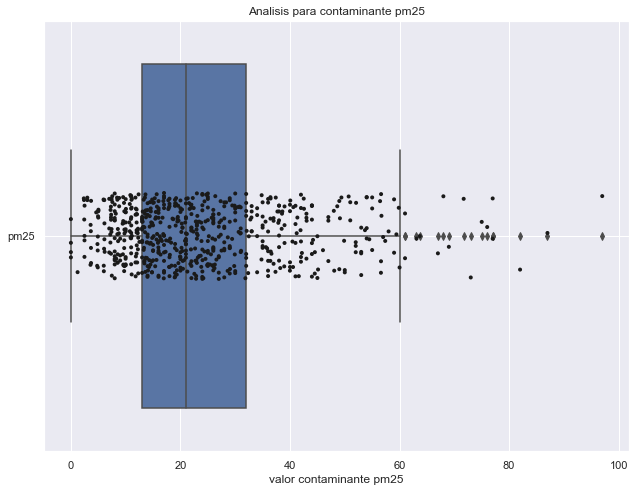

In [12]:
sns.set_theme(style='dark')

sns.boxplot(
    data = muestraContaminantes[ muestraContaminantes['contaminante'] == 'pm25' ],
    x = 'valor_contaminante',
    y = 'contaminante'
)

sns.stripplot(
    data = muestraContaminantes[ muestraContaminantes['contaminante'] == 'pm25' ],
    x='valor_contaminante',
    y='contaminante',
    size=4, color='k', linewidth=0
)

sns.set(rc={'figure.figsize':(9, 5)})

plt.title("Analisis para contaminante pm25")
plt.ylabel(''); plt.xlabel('valor contaminante pm25'); plt.grid()
plt.tight_layout()

# para guardar el plot
if guardar_imagenes:
    plt.savefig("boxplot_pm25.png", bbox_inches='tight', dpi=150)

plt.show()

## **Distribución y ajuste del contaminante PM2.5**

Con el fin de determinar qué distribución puede seguir los valores del contaminante PM2.5 registrados se han hecho los cálculos necesarios para encontrar aquella distribución de probabilidad que mejor se ajuste a los valores:

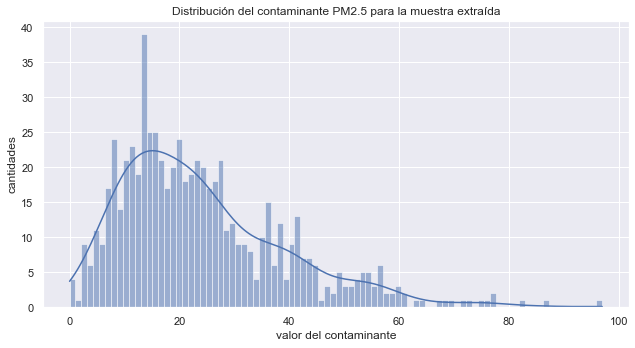

In [13]:
sns.set_theme(style='dark')

sns.histplot(
    muestraContaminantes[ muestraContaminantes["contaminante"] == "pm25" ],
    x='valor_contaminante',
    bins=90,
    kde=True
)

sns.set(rc={'figure.figsize':(9, 5)})
plt.title("Distribución del contaminante PM2.5 para la muestra extraída")
plt.xlabel("valor del contaminante"); plt.ylabel("cantidades"); plt.grid()
plt.tight_layout()

# para guardar el plot
if guardar_imagenes:
    plt.savefig("distr_pm25.png", bbox_inches='tight', dpi=130)

plt.show()

,sumsquare_error,aic,bic,kl_div
lognorm,0.001198,1115.275347,-8818.933348,inf
beta,0.001334,1131.728281,-8740.475162,inf
gamma,0.001335,1129.772933,-8746.955202,inf
chi2,0.001335,1129.770920,-8746.952950,inf
t,0.003077,1211.709983,-8188.926527,inf


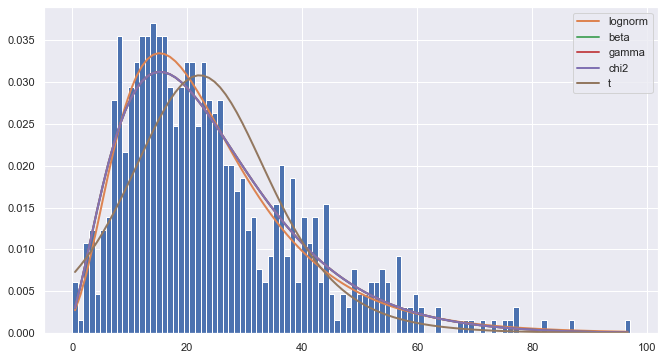

In [14]:
sns.set_theme(style='dark')

# ajuste a distribucion
f = Fitter(
    muestraContaminantes[muestraContaminantes["contaminante"] == "pm25"]["valor_contaminante"],
    distributions=['gamma',
                   'lognorm',
                   't',
                   'f',
                   "beta",
                   "chi2",
                   "norm"]
)

sns.set(rc={'figure.figsize':(11,6)}); plt.grid()
f.fit(); f.summary()

## **Comportamiento en el tiempo de los contaminantes**

* **PM25**

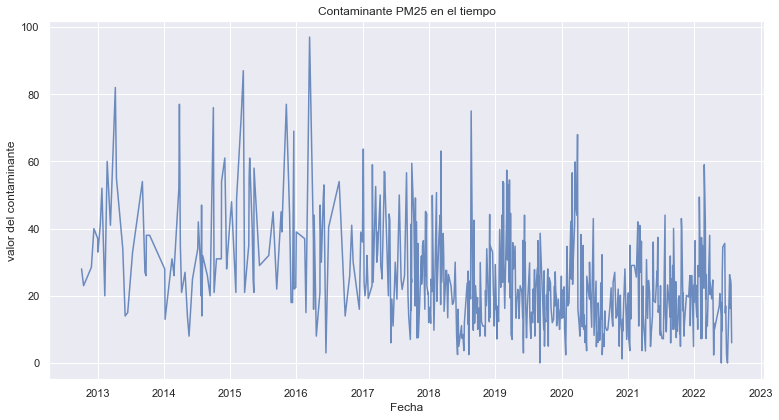

In [15]:
sns.lineplot(
    data = muestraContaminantes[muestraContaminantes["contaminante"] == "pm25"],
    x = "Fecha",
    y = "valor_contaminante",
    ci = False,
    alpha = 0.8
)

sns.set(rc={'figure.figsize':(9, 5)})

plt.title("Contaminante PM25 en el tiempo"); plt.ylabel("valor del contaminante")
plt.tight_layout()

# para guardar el plot
if guardar_imagenes:
    plt.savefig("muestraPM25_tiempo.png", bbox_inches='tight', dpi=200)

plt.show()

## **Tendencia**

Para visualizar con mejor detalle lo que sucede en términos de la tendencia del contaminante, veamos con una linea de tendencia los datos en su forma de dispersión

In [16]:
def toTimestamp(df):
    return datetime.timestamp(df)

Para calcular la linea de tendencia, es necesario que los datos en el eje x sean de tipo `timestamp`, de esta forma los calculos serán permitidos y podremos determinar el orden de ajuste.

In [17]:
# para calcular la linea de tendencia se requieren datos tipo
# 'timestamp' en el eje x
muestraFechaTimestamp = muestraContaminantes.copy()
muestraFechaTimestamp["Fecha"] = muestraFechaTimestamp["Fecha"].apply(toTimestamp)

muestraFechaTimestamp

,Fecha,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,1.349413e+09,Friday,10,28.0000,1,1,25,pm25
1,1.350364e+09,Tuesday,2,23.0000,1,1,25,pm25
2,1.354079e+09,Wednesday,1,8.0000,1,1,25,pm25
3,1.354079e+09,Wednesday,7,49.0000,1,1,25,pm25
4,1.355288e+09,Wednesday,5,40.0000,1,1,12,pm25
...,...,...,...,...,...,...,...,...
1595,1.658207e+09,Tuesday,21,25.0000,1,1,44,pm25
1596,1.658466e+09,Friday,14,25.0000,1,1,12,pm25
1597,1.658466e+09,Friday,23,22.0000,1,1,12,pm25
1598,1.658812e+09,Tuesday,13,6.0160,1,1,83,pm25


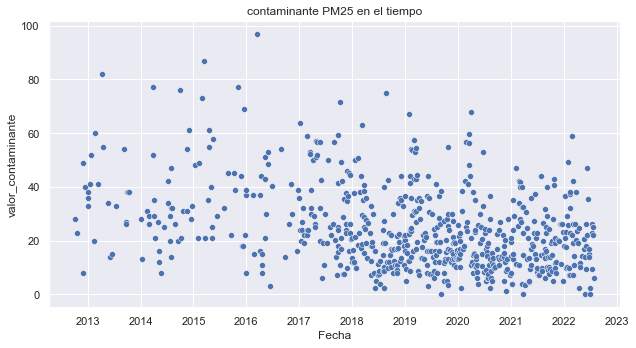

In [18]:
sns.scatterplot(
    data = muestraContaminantes[muestraContaminantes["contaminante"] == "pm25"],
    x = "Fecha",
    y = "valor_contaminante"
)

sns.set(rc={'figure.figsize':(10, 5)})

plt.title("contaminante PM25 en el tiempo")
plt.tight_layout(); plt.show()

Veamos, para los distintos contaminantes, una linea de tendencia que se ajuste a los datos, para un orden y un contaminante determinado con la siguiente función que permite graficar estos datos:

In [19]:
def scatterFit(contaminante, ordenAjuste=1, save=False):

    # dispersion y linea de tendencia para los datos con timestamp
    sns.regplot(
        data=muestraFechaTimestamp[muestraFechaTimestamp["contaminante"] == contaminante],
        x="Fecha",
        y="valor_contaminante",
        line_kws={"color": "orange"},
        order=ordenAjuste  # orden del ajuste
    )

    # configurar las fechas como datetime para el eje x
    ax = plt.gca()
    xticks = ax.get_xticks()
    xticks_dates = [datetime.fromtimestamp(x).strftime('%Y-%m') for x in xticks]
    ax.set_xticklabels(xticks_dates)

    sns.set(rc={'figure.figsize':(10, 5)})

    plt.title(f"contaminante {contaminante} en el tiempo")
    plt.tight_layout();

    if save == True:
        plt.savefig(f'trendline{contaminante}.png', bbox_inches='tight', dpi=200)
    
    plt.show()
    
    pass

Veamos los ajustes para cada uno de los contaminantes:

C:\Users\Administrador\AppData\Local\Temp\ipykernel_8760\3476521949.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_dates)


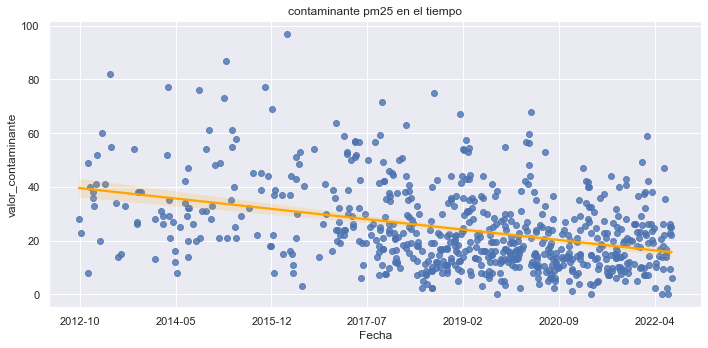

C:\Users\Administrador\AppData\Local\Temp\ipykernel_8760\3476521949.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_dates)


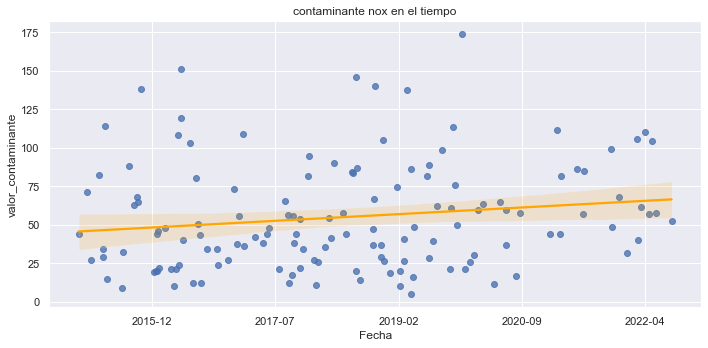

C:\Users\Administrador\AppData\Local\Temp\ipykernel_8760\3476521949.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_dates)


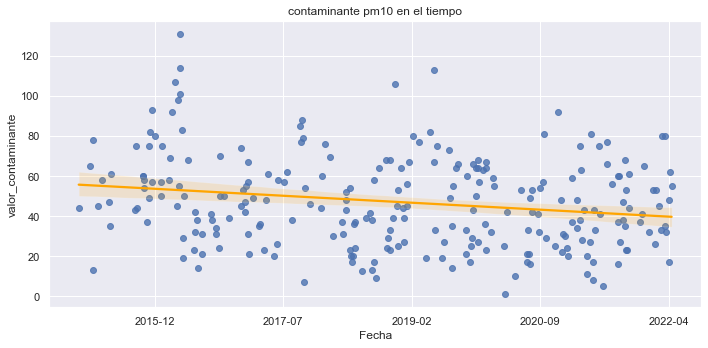

C:\Users\Administrador\AppData\Local\Temp\ipykernel_8760\3476521949.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_dates)


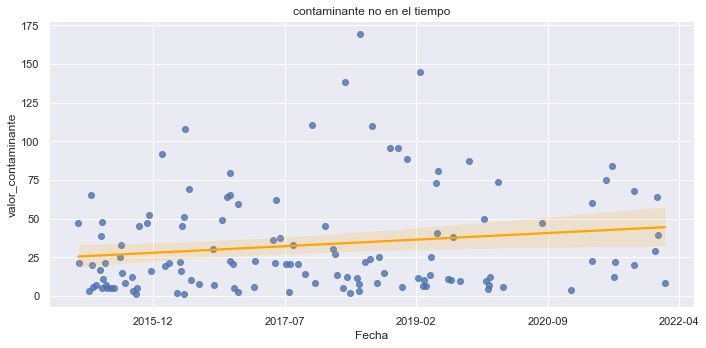

C:\Users\Administrador\AppData\Local\Temp\ipykernel_8760\3476521949.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_dates)


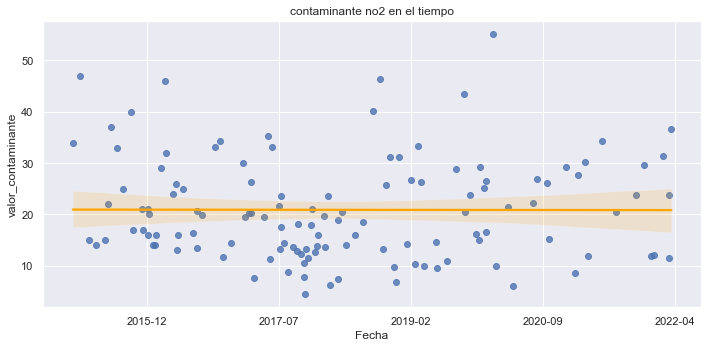

C:\Users\Administrador\AppData\Local\Temp\ipykernel_8760\3476521949.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_dates)


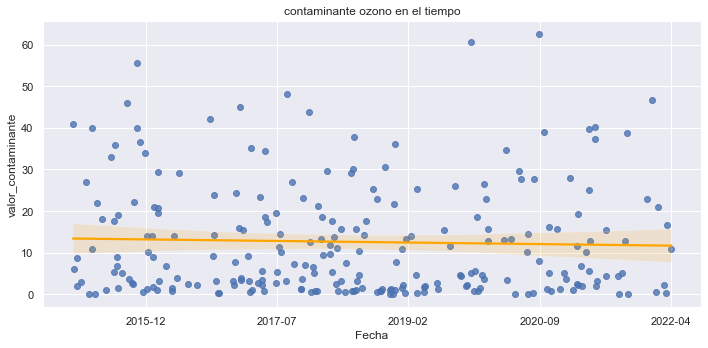

C:\Users\Administrador\AppData\Local\Temp\ipykernel_8760\3476521949.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_dates)


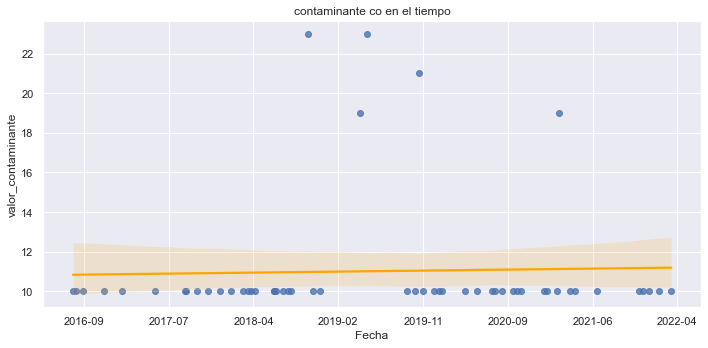

In [20]:
contaminantes = muestraContaminantes["contaminante"].unique()

for cont in contaminantes:
    scatterFit(cont, ordenAjuste=1, save=guardar_imagenes)

## **Comportamiento por periodos de tiempo**

Se tendrá la opción de analizar una media móvil a distintos valores para distintos periodos de tiempo

In [21]:
# obtener las semanas para cada año

def getWeek(df):
    return df.isocalendar()[1]

def getYear(df):
    return df.year

def getDay(df):
    return df.day

def getMonth(df):
    return df.month

muestraContaminantes.insert( 1, "año", muestraContaminantes["Fecha"].apply(getYear) )
muestraContaminantes.insert( 1, "mes", muestraContaminantes["Fecha"].apply(getMonth) )
muestraContaminantes.insert( 1, "semana", muestraContaminantes["Fecha"].apply(getWeek) )
muestraContaminantes.insert( 1, "dia", muestraContaminantes["Fecha"].apply(getDay) )
muestraContaminantes

,Fecha,dia,semana,mes,año,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-10-05,5,40,10,2012,Friday,10,28.0000,1,1,25,pm25
1,2012-10-16,16,42,10,2012,Tuesday,2,23.0000,1,1,25,pm25
2,2012-11-28,28,48,11,2012,Wednesday,1,8.0000,1,1,25,pm25
3,2012-11-28,28,48,11,2012,Wednesday,7,49.0000,1,1,25,pm25
4,2012-12-12,12,50,12,2012,Wednesday,5,40.0000,1,1,12,pm25
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,2022-07-19,19,29,7,2022,Tuesday,21,25.0000,1,1,44,pm25
1596,2022-07-22,22,29,7,2022,Friday,14,25.0000,1,1,12,pm25
1597,2022-07-22,22,29,7,2022,Friday,23,22.0000,1,1,12,pm25
1598,2022-07-26,26,30,7,2022,Tuesday,13,6.0160,1,1,83,pm25


Unicamente para la muestra del PM25 tendremos:

In [22]:
muestraPM25 = muestraContaminantes[ muestraContaminantes["contaminante"] == "pm25" ]
muestraPM25

,Fecha,dia,semana,mes,año,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-10-05,5,40,10,2012,Friday,10,28.0000,1,1,25,pm25
1,2012-10-16,16,42,10,2012,Tuesday,2,23.0000,1,1,25,pm25
2,2012-11-28,28,48,11,2012,Wednesday,1,8.0000,1,1,25,pm25
3,2012-11-28,28,48,11,2012,Wednesday,7,49.0000,1,1,25,pm25
4,2012-12-12,12,50,12,2012,Wednesday,5,40.0000,1,1,12,pm25
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,2022-07-18,18,29,7,2022,Monday,23,9.5791,1,1,80,pm25
1595,2022-07-19,19,29,7,2022,Tuesday,21,25.0000,1,1,44,pm25
1596,2022-07-22,22,29,7,2022,Friday,14,25.0000,1,1,12,pm25
1597,2022-07-22,22,29,7,2022,Friday,23,22.0000,1,1,12,pm25


## **Promedio del contaminante por semana**

En este caso, haremos los cálculos de los promedios por estación, para cada semana de cada año. Luego se podrá hacer para cada mes también.

In [23]:
estaciones = muestraPM25["estacion"].unique()
contaminantes = muestraPM25["contaminante"].unique()
semanas = muestraPM25["semana"].unique()
meses = muestraPM25["mes"].unique()
years = muestraPM25["año"].unique()

In [24]:
promedio_semana = [];  newYears = [];  newSemanas = [];  newEstaciones = []

for year in years:
    for semana in semanas:
        for estacion in estaciones:
            promedio_semana.append(
                np.mean(
                    muestraPM25[
                        (muestraPM25["año"] == year) & \
                        (muestraPM25["semana"] == semana) & \
                        (muestraPM25["estacion"] == estacion)
                    ]["valor_contaminante"]
                )
            )
        newEstaciones += list(estaciones)
        newSemanas += len(estaciones)*[semana]
        newYears += len(estaciones)*[year]

In [25]:
# funcion para concatenar dos listas, elemento a elemento
def addLists(firstList, secondList):
    finalList= []
    for i in range( len(firstList) ):
        finalList.append( str(firstList[i]) + '-' + str(secondList[i]) )
    return finalList

In [26]:
prom_muestra_pm25 = {
    "fecha":addLists(newYears, newSemanas),
    "año":newYears,
    "semana":newSemanas,
    "estacion":newEstaciones,
    "promedio_contaminante":promedio_semana
}

prom_muestra_pm25_df = pd.DataFrame(data=prom_muestra_pm25)

prom_muestra_pm25_df = prom_muestra_pm25_df.dropna()

prom_muestra_pm25_df

,fecha,año,semana,estacion,promedio_contaminante
0,2012-40,2012,40,25,28.0000
10,2012-42,2012,42,25,23.0000
20,2012-48,2012,48,25,28.5000
31,2012-50,2012,50,12,40.0000
531,2013-40,2013,40,12,38.0000
...,...,...,...,...,...
5773,2022-29,2022,29,44,25.0000
5778,2022-29,2022,29,80,9.5791
5823,2022-25,2022,25,44,17.0000
5824,2022-25,2022,25,79,13.7078


Ordenamos por año y semana:

In [27]:
prom_muestra_pm25_df = prom_muestra_pm25_df.sort_values(by=["año", "semana"]).reset_index().drop("index", axis=1)
prom_muestra_pm25_df

,fecha,año,semana,estacion,promedio_contaminante
0,2012-40,2012,40,25,28.000000
1,2012-42,2012,42,25,23.000000
2,2012-48,2012,48,25,28.500000
3,2012-50,2012,50,12,40.000000
4,2013-1,2013,1,25,35.500000
...,...,...,...,...,...
590,2022-28,2022,28,79,26.277800
591,2022-29,2022,29,12,23.333333
592,2022-29,2022,29,44,25.000000
593,2022-29,2022,29,80,9.579100


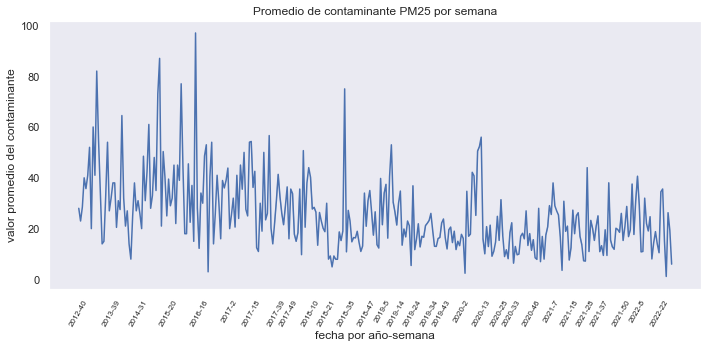

In [28]:
sns.set_theme(style="dark")

sns.lineplot(
    data=prom_muestra_pm25_df,
    x="fecha",
    y="promedio_contaminante",
    ci = False
)

elements = [ np.array(prom_muestra_pm25_df["fecha"])[i] for i in range(0, len(prom_muestra_pm25_df["fecha"]), 20) ]

plt.xticks(elements, fontsize=8, rotation=60)
plt.title("Promedio de contaminante PM25 por semana")
plt.xlabel("fecha por año-semana"); plt.ylabel("valor promedio del contaminante")
plt.tight_layout()

# save figure
if guardar_imagenes:
    plt.savefig("muestra_pm25_semana.png", bbox_inches="tight", dpi=200)

plt.show()

Adición de la **media movil** para una cantidad $n$ de intervalo:

In [29]:
def calcular_media_movil(valores = 5):

    media_movil = prom_muestra_pm25_df["promedio_contaminante"].rolling(valores).mean()

    sns.set_theme(style="dark")

    sns.lineplot(
        data = prom_muestra_pm25_df,
        x = "fecha",
        y = "promedio_contaminante",
        ci = False,
        alpha = 0.3,
        label = "promedio PM2.5 por semana"
    )

    plt.plot(
        np.array(prom_muestra_pm25_df["fecha"]),
        media_movil,
        label = f"media móvil a {valores} valores",
    )

    elements = [ np.array(prom_muestra_pm25_df["fecha"])[i] for i in range(0, len(prom_muestra_pm25_df["fecha"]), 20) ]

    plt.xticks(elements, fontsize=8, rotation=60)
    plt.title("Promedio de contaminante PM25 por semana")
    plt.xlabel("fecha por año-semana"); plt.ylabel("valor promedio del contaminante")

    plt.legend(); plt.tight_layout();

    # save figure
    if guardar_imagenes:
        plt.savefig(f"movil_pm25_semana_{valores}_valores.png", bbox_inches="tight", dpi=200)

    plt.show()

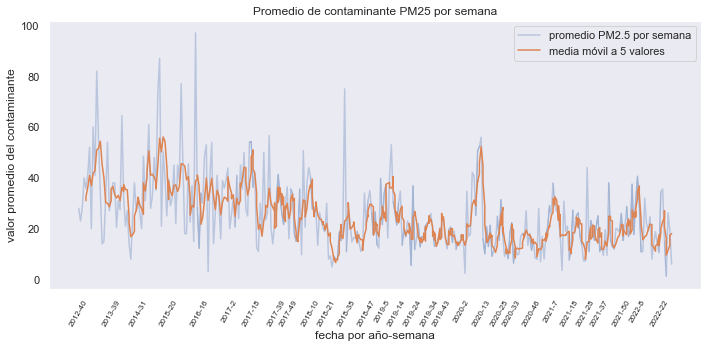

In [30]:
calcular_media_movil(valores = 5)

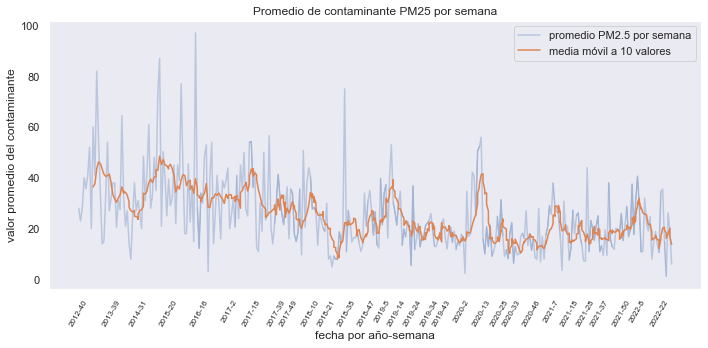

In [31]:
calcular_media_movil(valores=10)

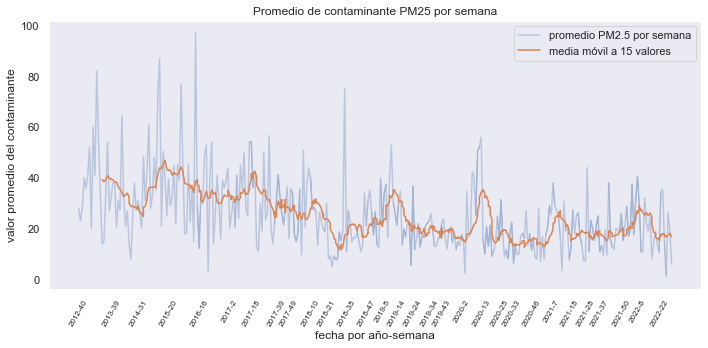

In [32]:
calcular_media_movil(valores=15)

## **Promedio del contaminante por mes**

In [33]:
promedio_mes = [];  newYears = [];  newMes = []

for year in years:
    for mes in meses:
        promedio_mes.append(
            np.mean(
                muestraPM25[
                    (muestraPM25["año"] == year) & \
                    (muestraPM25["mes"] == mes)
                ]["valor_contaminante"]
            )
        )
    newMes += list(meses)
    newYears += len(meses)*[year]

In [34]:
prom_muestra_mes_pm25 = {
    "fecha":addLists(newYears, newMes),
    "año":newYears,
    "mes":newMes,
    "promedio_contaminante":promedio_mes
}

prom_muestra_mes_pm25_df = pd.DataFrame(data=prom_muestra_mes_pm25)

prom_muestra_mes_pm25_df = prom_muestra_mes_pm25_df.dropna()

prom_muestra_mes_pm25_df = prom_muestra_mes_pm25_df.sort_values(by=["año", "mes"]).reset_index().drop("index", axis=1)
prom_muestra_mes_pm25_df

,fecha,año,mes,promedio_contaminante
0,2012-10,2012,10,25.500000
1,2012-11,2012,11,28.500000
2,2012-12,2012,12,40.000000
3,2013-1,2013,1,40.000000
4,2013-2,2013,2,40.000000
...,...,...,...,...
108,2022-3,2022,3,22.815140
109,2022-4,2022,4,13.598200
110,2022-5,2022,5,13.215020
111,2022-6,2022,6,20.604420


calculemos la media móvil:

In [52]:
def calcular_media_movil_mes(valores = 5):

    media_movil = prom_muestra_mes_pm25_df["promedio_contaminante"].rolling(valores).mean()

    sns.set_theme(style="dark")

    sns.lineplot(
        data = prom_muestra_mes_pm25_df,
        x = "fecha",
        y = "promedio_contaminante",
        ci = False,
        alpha = 0.3,
        label = "promedio PM2.5 por mes"
    )

    plt.plot(
        np.array(prom_muestra_mes_pm25_df["fecha"]),
        media_movil,
        label = f"media móvil a {valores} valores",
    )

    elements = [ np.array(prom_muestra_mes_pm25_df["fecha"])[i] for i in range(0, len(prom_muestra_mes_pm25_df["fecha"]), 10) ]

    plt.xticks(elements, fontsize=10, rotation=45)
    plt.title("Promedio de contaminante PM25 por mes")
    plt.xlabel("fecha por año-mes"); plt.ylabel("valor promedio del contaminante")

    plt.legend(); plt.grid(); plt.tight_layout();

    # save figure
    if guardar_imagenes:
        plt.savefig(f"movil_pm25_mes_{valores}_valores.png", bbox_inches="tight", dpi=150)

    plt.show()

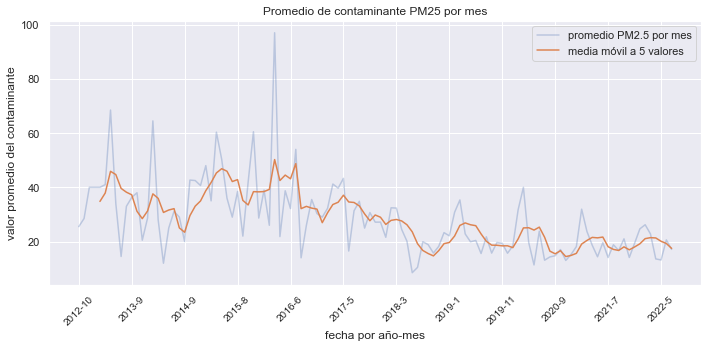

In [53]:
calcular_media_movil_mes(valores = 5)